<a href="https://colab.research.google.com/github/Kamal254/Chat_bot/blob/master/BitcoinDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [70]:
df = pd.read_csv('dataset.csv')
df.head(10)

height      timestamp  size  tx_count  difficulty  median_fee_rate  \
0       1  1231469665000   215         1         1.0              0.0   
1       2  1231469744000   215         1         1.0              0.0   
2       3  1231470173000   215         1         1.0              0.0   
3       4  1231470988000   215         1         1.0              0.0   
4       5  1231471428000   215         1         1.0              0.0   
5       6  1231471789000   215         1         1.0              0.0   
6       7  1231472369000   215         1         1.0              0.0   
7       8  1231472743000   215         1         1.0              0.0   
8       9  1231473279000   215         1         1.0              0.0   
9      10  1231473952000   215         1         1.0              0.0   

   avg_fee_rate  total_fees  fee_range_min  fee_range_max  input_count  \
0             0           0            0.0            0.0            0   
1             0           0            0.0            0.0            0   
2             0           0            0.0            0.0            0   
3             0           0            0.0            0.0            0   
4             0           0            0.0            0.0            0   
5             0           0            0.0            0.0            0   
6             0           0            0.0            0.0            0   
7             0           0            0.0            0.0            0   
8             0           0            0.0            0.0            0   
9             0           0            0.0            0.0            0   

   output_count  output_amount  
0             1              0  
1             1              0  
2             1              0  
3             1              0  
4             1              0  
5             1              0  
6             1              0  
7             1              0  
8             1              0  
9             1              0

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804668 entries, 0 to 804667
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   height           804668 non-null  int64  
 1   timestamp        804668 non-null  int64  
 2   size             804668 non-null  int64  
 3   tx_count         804668 non-null  int64  
 4   difficulty       804668 non-null  float64
 5   median_fee_rate  804668 non-null  float64
 6   avg_fee_rate     804668 non-null  int64  
 7   total_fees       804668 non-null  int64  
 8   fee_range_min    804668 non-null  float64
 9   fee_range_max    804668 non-null  float64
 10  input_count      804668 non-null  int64  
 11  output_count     804668 non-null  int64  
 12  output_amount    804668 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 79.8 MB


In [72]:
df.describe()

height     timestamp          size       tx_count    difficulty  \
count  804668.000000  8.046680e+05  8.046680e+05  804668.000000  8.046680e+05   
mean   402334.500000  1.461348e+12  6.288598e+05    1098.575234  7.449962e+12   
std    232287.787542  1.305817e+11  5.998891e+05    1106.430154  1.243851e+13   
min         1.000000  1.231470e+12  1.760000e+02       1.000000  1.000000e+00   
25%    201167.750000  1.348973e+12  3.333550e+04      68.000000  2.864141e+06   
50%    402334.500000  1.457787e+12  4.397995e+05     667.000000  1.634917e+11   
75%    603501.250000  1.573596e+12  1.140764e+06    2079.000000  1.294859e+13   
max    804668.000000  1.692886e+12  3.978938e+06   12239.000000  5.562144e+13   

       median_fee_rate  avg_fee_rate    total_fees  fee_range_min  \
count     8.046680e+05  8.046680e+05  8.046680e+05  804668.000000   
mean      5.500943e+01  9.334386e+01  3.348021e+07       9.376817   
std       1.204936e+03  1.885444e+03  9.181505e+07     147.811305   
min       0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%       1.000000e+00  1.000000e+01  1.939169e+06       0.000000   
50%       1.400000e+01  2.900000e+01  1.041885e+07       1.000000   
75%       5.100000e+01  8.300000e+01  3.141290e+07       1.000000   
max       1.029502e+06  1.143052e+06  2.915328e+10   56155.000000   

       fee_range_max    input_count   output_count  output_amount  
count   8.046680e+05  804668.000000  804668.000000   8.046680e+05  
mean    2.093577e+11    2869.449523    3083.856496   1.044516e+12  
std     1.878007e+14    2687.080207    3254.668625   3.487197e+12  
min     0.000000e+00       0.000000       1.000000   0.000000e+00  
25%     2.240000e+02     153.000000     166.000000   8.286572e+10  
50%     4.730000e+02    2038.000000    1818.000000   4.016351e+11  
75%     1.312000e+03    5371.000000    5483.000000   1.135333e+12  
max     1.684634e+17   20894.000000   23642.000000   6.499324e+14

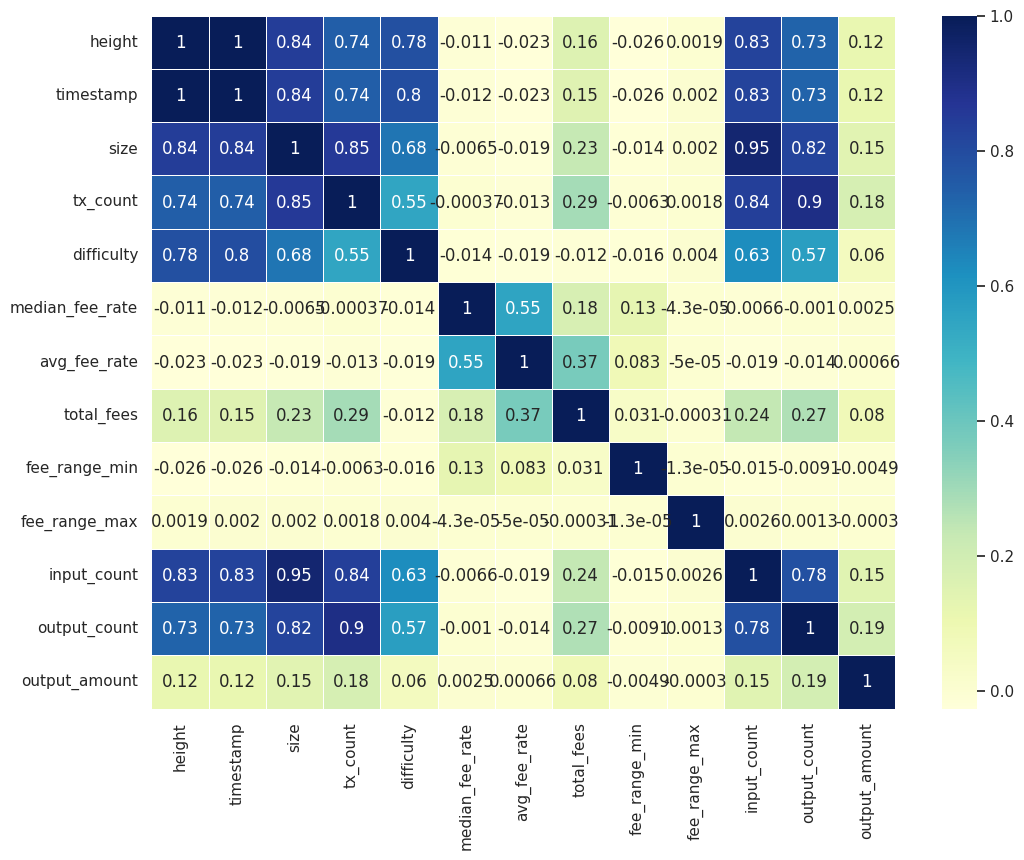

In [83]:
# As we can see all the column are integer/float
plt.figure(figsize=(12, 9))
data_corr_plot = sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, linewidths=0.7)
plt.show()

# as we can see height and timestamp completely correlated to each other we can drop any one from them

In [74]:
# Plot between
df['size'].value_counts()

216        55546
215        25417
473         1839
474         1686
217         1381
           ...  
1001145        1
1002100        1
1003105        1
1000611        1
1431158        1
Name: size, Length: 449469, dtype: int64

In [75]:
# *************Lets Create a column that hold year of the transection**********

import pandas as pd
import datetime
def extract_year_from_timestamp_milliseconds(timestamp):
    try:
        # Convert milliseconds to seconds
        timestamp_seconds = timestamp / 1000
        return datetime.datetime.fromtimestamp(timestamp_seconds).year
    except (ValueError, OSError):
        return None  # Handle invalid timestamps

# Create a new DataFrame to store the result and add the 'year' column
df_result = df.copy()
df_result['year'] = df_result['timestamp'].apply(extract_year_from_timestamp_milliseconds)

df_result.head(10)


height      timestamp  size  tx_count  difficulty  median_fee_rate  \
0       1  1231469665000   215         1         1.0              0.0   
1       2  1231469744000   215         1         1.0              0.0   
2       3  1231470173000   215         1         1.0              0.0   
3       4  1231470988000   215         1         1.0              0.0   
4       5  1231471428000   215         1         1.0              0.0   
5       6  1231471789000   215         1         1.0              0.0   
6       7  1231472369000   215         1         1.0              0.0   
7       8  1231472743000   215         1         1.0              0.0   
8       9  1231473279000   215         1         1.0              0.0   
9      10  1231473952000   215         1         1.0              0.0   

   avg_fee_rate  total_fees  fee_range_min  fee_range_max  input_count  \
0             0           0            0.0            0.0            0   
1             0           0            0.0            0.0            0   
2             0           0            0.0            0.0            0   
3             0           0            0.0            0.0            0   
4             0           0            0.0            0.0            0   
5             0           0            0.0            0.0            0   
6             0           0            0.0            0.0            0   
7             0           0            0.0            0.0            0   
8             0           0            0.0            0.0            0   
9             0           0            0.0            0.0            0   

   output_count  output_amount  year  
0             1              0  2009  
1             1              0  2009  
2             1              0  2009  
3             1              0  2009  
4             1              0  2009  
5             1              0  2009  
6             1              0  2009  
7             1              0  2009  
8             1              0  2009  
9             1              0  2009

# Year Based Analysis


In [76]:
df_result.columns

Index(['height', 'timestamp', 'size', 'tx_count', 'difficulty',
       'median_fee_rate', 'avg_fee_rate', 'total_fees', 'fee_range_min',
       'fee_range_max', 'input_count', 'output_count', 'output_amount',
       'year'],
      dtype='object')

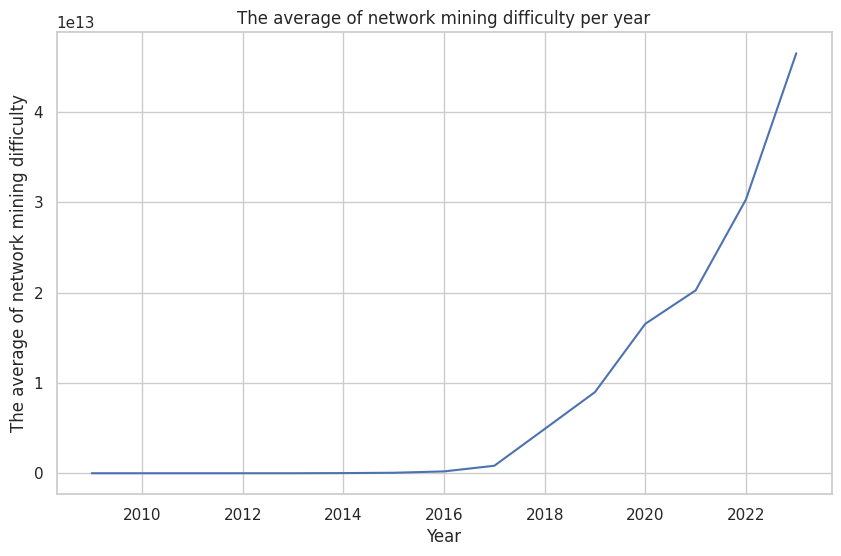

In [77]:
sns.set(style="whitegrid")

difficulty_mean = df_result.groupby('year')['difficulty'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=difficulty_mean.index, y=difficulty_mean.values)


plt.xlabel('Year')
plt.ylabel('The average of network mining difficulty')
plt.title('The average of network mining difficulty per year')

plt.show()

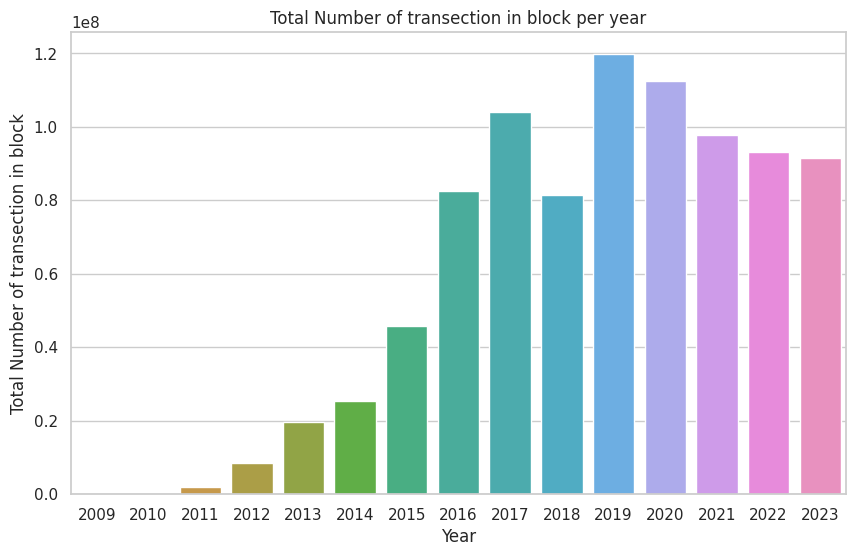

In [78]:
sns.set(style="whitegrid")

tx_count_sum = df_result.groupby('year')['tx_count'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=tx_count_sum.index, y=tx_count_sum.values)

plt.xlabel('Year')
plt.ylabel('Total Number of transection in block')
plt.title('Total Number of transection in block per year')

plt.show()

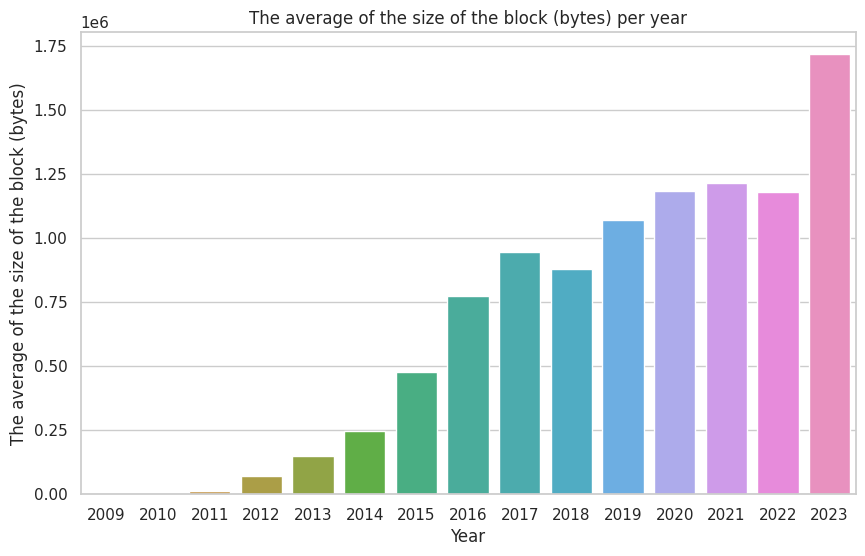

In [79]:
sns.set(style="whitegrid")

avg_size = df_result.groupby('year')['size'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_size.index, y=avg_size.values)

plt.xlabel('Year')
plt.ylabel('The average of the size of the block (bytes)')
plt.title('The average of the size of the block (bytes) per year')

plt.show()

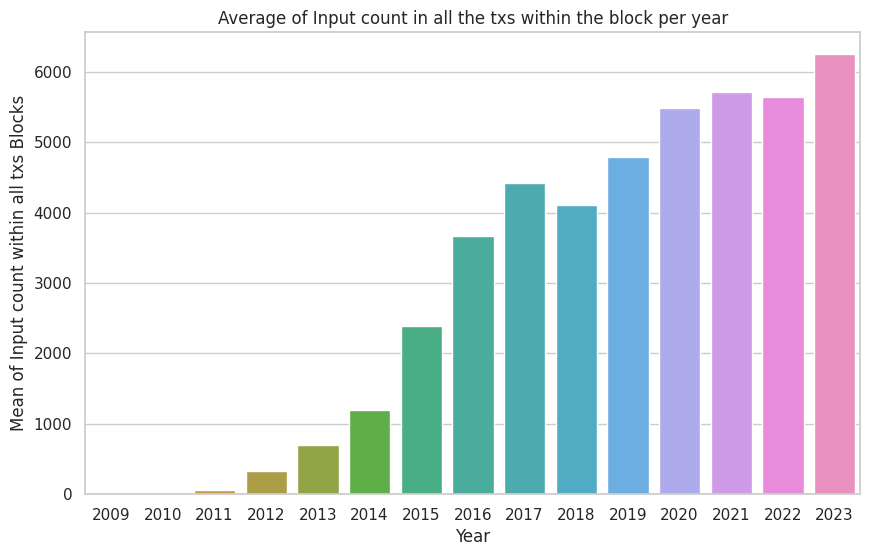

In [80]:
input_count_mean= df_result.groupby('year')['input_count'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=input_count_mean.index, y=input_count_mean.values)

plt.xlabel('Year')
plt.ylabel('Mean of Input count within all txs Blocks')
plt.title('Average of Input count in all the txs within the block per year')

plt.show()

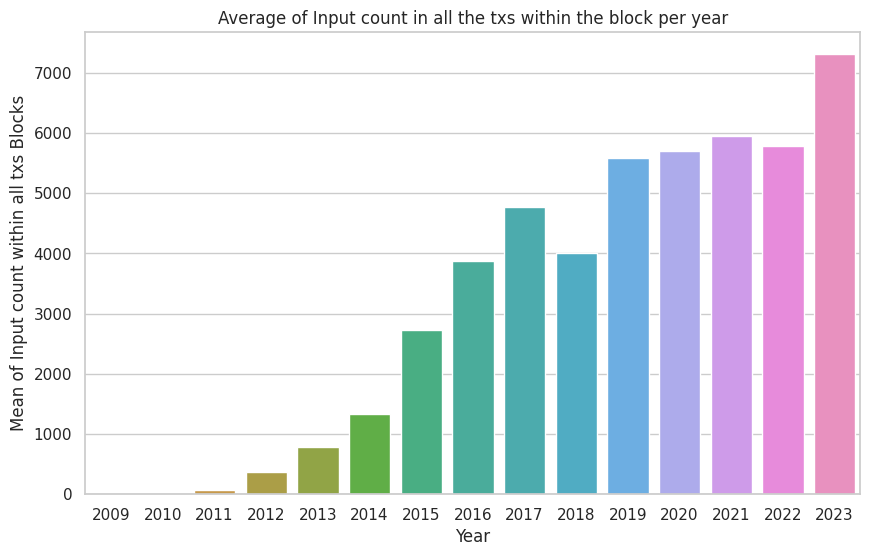

In [81]:
output_count_mean= df_result.groupby('year')['output_count'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=output_count_mean.index, y=output_count_mean.values)

plt.xlabel('Year')
plt.ylabel('Mean of Input count within all txs Blocks')
plt.title('Average of Input count in all the txs within the block per year')

plt.show()

In [100]:
threed_data = df_result[df_result['year']>2016]

fig = px.scatter_3d(threed_data.sample(frac=0.1),  # Sample a fraction of the data
                    x='year', y='tx_count', z='difficulty', color='difficulty')

fig.update_layout(title='3D Scatter Plot', scene=dict(aspectmode='cube'))
fig.show()

In [105]:
# We can Say that If the Size of High , probability of Difficulty is getting lower

threed_data = df_result[df_result['year']>2012]

fig = px.scatter_3d(threed_data.sample(frac=0.2),  # Sample a fraction of the data
                    x='year', y='size', z='difficulty', color='difficulty')

fig.update_layout(title='3D Scatter Plot', scene=dict(aspectmode='cube'))
fig.show()

In [107]:
threed_data = df_result[df_result['year']>2012]

fig = px.scatter_3d(threed_data.sample(frac=0.1),  # Sample a fraction of the data
                    x='tx_count', y='size', z='difficulty', color='year')

fig.update_layout(title='3D Scatter Plot', scene=dict(aspectmode='cube'))
fig.show()